In [1]:
# Preamble
import numpy as np
import glob
import matplotlib
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import os

In [2]:
scale_factor = 1000000 #MPa

# For the fault figure
cmax_f =   8000000 / scale_factor
cmin_f =  -8000000 / scale_factor
levels = np.linspace(cmin_f, cmax_f, 16)
colors_l = 'w'


xx_f, yy_f = np.loadtxt('vertx0.ts', delimiter=' ', usecols=(1, 2), unpack=True)
tri1, tri2, tri3 = np.loadtxt('triang0.ts', dtype=int, delimiter=' ', usecols=(0, 1, 2), unpack=True)
xx_f = xx_f/1000
yy_f = yy_f/1000
mu_s = 0.6

tria = []
for i in range(len(tri1)):
    tria.append([tri1[i]-1, tri2[i]-1, tri3[i]-1])

triangles = np.asarray(tria)
# read the files
list_files_m = glob.glob('output_offm2p5_gapm5p0n/offm2p5_gapm5p0-faultreceivern*.dat')
list_files_p = glob.glob('output_offm2p5_gapp5p0n/offm2p5_gapp5p0-faultreceivern*.dat')
list_files_m.sort()
list_files_p.sort()
n_files = len(list_files_m)
n_cols = 20
n_steps = 81

k = 0
count = 0
data_m = np.zeros((n_files,n_steps,n_cols), dtype=np.float64)
data_p = np.zeros((n_files,n_steps,n_cols), dtype=np.float64)
for f in range(len(list_files_m)):
    infile_m = open(list_files_m[f],'r')
    infile_p = open(list_files_p[f],'r')
    dat_m = infile_m.read()
    vals_m = dat_m.split("\n")
    dat_p = infile_p.read()
    vals_p = dat_p.split("\n")
    for i in range(n_steps):
        val_m = vals_m[i].split(" ")
        val_p = vals_p[i].split(" ")
        for j in range(n_cols):
            data_m[k][i][j] = float(val_m[j])
            data_p[k][i][j] = float(val_p[j])
    infile_m.close()
    infile_p.close()
    k += 1

xx_m = xx_f[triangles].mean(axis = 1)
yy_m = yy_f[triangles].mean(axis = 1)

rec fault coords:  3.5464832302000002 47.412710813 -2.0
rec fault coords:  3.5592970817 47.369581454999995 -2.0
rec coords:  3.57766631 47.368442800000004 -3.0
output_h_plus/lines_00006.dat
output_h_plus/lines_00008.dat
output_h_plus/lines_00010.dat
output_h_plus/lines_00012.dat
output_h_plus/lines_00014.dat
output_h_plus/lines_00016.dat
output_h_plus/lines_00018.dat
output_h_plus/lines_00020.dat
output_h_plus/lines_00022.dat
output_h_plus/lines_00024.dat
output_h_plus/lines_00026.dat
output_h_plus/lines_00028.dat
output_h_plus/lines_00030.dat
output_h_plus/lines_00032.dat
output_h_plus/lines_00034.dat
output_h_plus/lines_00036.dat
output_h_plus/lines_00038.dat
output_h_plus/lines_00040.dat
output_h_plus/lines_00042.dat
output_h_plus/lines_00044.dat
output_h_plus/lines_00046.dat
output_h_plus/lines_00048.dat
output_h_plus/lines_00050.dat
output_h_plus/lines_00052.dat
output_h_plus/lines_00054.dat
output_h_plus/lines_00056.dat
output_h_plus/lines_00058.dat
output_h_plus/lines_00060.dat


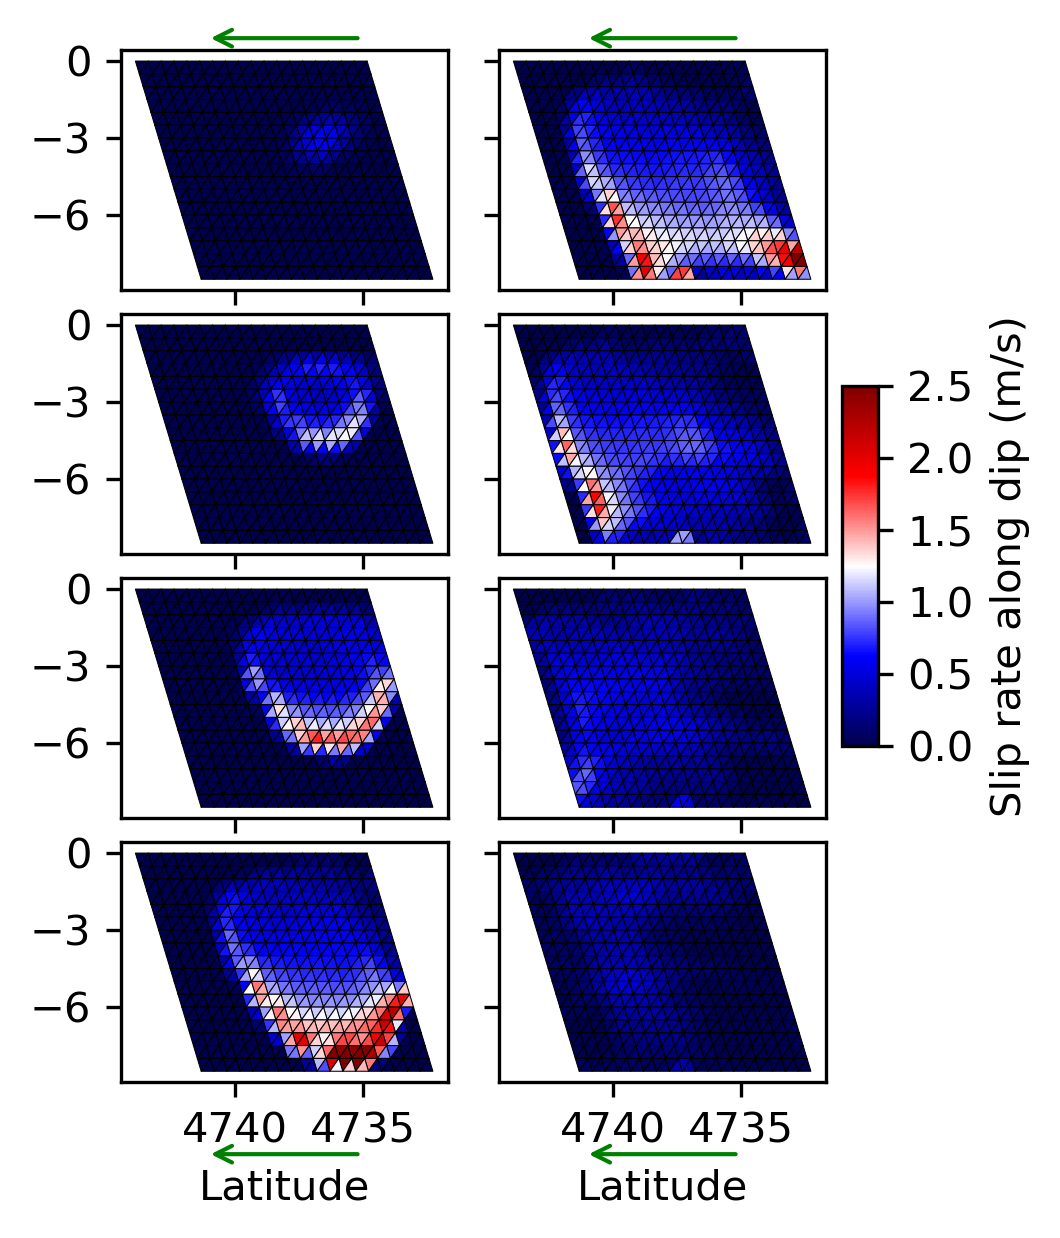

In [73]:
# Load the virtual receiver coordinates (horizontal)
xx = np.loadtxt('xx_coord.dat', usecols=(0), unpack=True)
yy = np.loadtxt('yy_coord.dat', usecols=(0), unpack=True)

xx = xx / 100000
yy = yy / 100000

vet_trace = np.loadtxt('vettore_trace_3k_depth.dat', delimiter=' ', usecols=(0,1), unpack=True)
lag_trace = np.loadtxt('llaga_trace_overlap.dat', delimiter=' ', usecols=(0,1), unpack=True)
lag_trace_p5 = np.loadtxt('llaga_p5_3k.dat', delimiter=' ', usecols=(0,1), unpack=True)
lag_trace_m5 = np.loadtxt('llaga_m5_3k.dat', delimiter=' ', usecols=(0,1), unpack=True)

vet_trace = vet_trace / 100000
lag_trace = lag_trace / 100000
lag_trace_m5 = lag_trace_m5 / 100000
lag_trace_p5 = lag_trace_p5 / 100000

# Strike vector
stk_v = [-0.43051,   0.90259,   0.00000];
stk_v = np.array(stk_v)
a = [349584,  4.74132e+6,  -8500];
b = [354640,  4.74373e+6,  -500];
a = np.array(a)
b = np.array(b)
# Dip vector
dip_v = (a-b)/np.linalg.norm(a-b);

# Normal vector to the fault
n_v = np.cross(stk_v,dip_v);
n_v = n_v/np.linalg.norm(n_v);
n = n_v

# Static coefficient
mu_s = 0.6

# Rotation matrix
matrix = np.array([dip_v,stk_v,n_v])

# List of files
snaps_list = glob.glob('output_h_plus/lines_00*.dat')
snaps_list.sort()


# Read a given receiver and check the CFF time series at that receiver location
rec_id_fault = 19*4 + 15
rec_id_fault_2 = 19*6 + 7
path = 'output_offm2p5_gapm5p0n/offm2p5_gapm5p0-faultreceiver-'
file_name = path + str(rec_id_fault).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines = fin.readlines()
x_rec_f = float(lines[2].split("       ")[1])/100000
y_rec_f = float(lines[3].split("       ")[1])/100000
z_rec_f = float(lines[4].split("      ")[1])/1000
print("rec fault coords: ",x_rec_f,y_rec_f,z_rec_f)

path = 'output_offm2p5_gapm5p0n/offm2p5_gapm5p0-faultreceiver-'
file_name = path + str(rec_id_fault_2).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines = fin.readlines()
x_rec_f_2 = float(lines[2].split("       ")[1])/100000
y_rec_f_2 = float(lines[3].split("       ")[1])/100000
z_rec_f_2 = float(lines[4].split("      ")[1])/1000
print("rec fault coords: ",x_rec_f_2,y_rec_f_2,z_rec_f)



# Horizontal dimension
nx = 40;
ny = 55;

# Dimension vertical profile
nstk = 31;
nz = 30;

stk = np.linspace(0,500*(nstk-1),31)
zz = np.linspace(-500*(nz-1) + 500,500,30)

stk = stk / 1000;
zz = zz / 1000;

dt_stamp = 0.1   # sampling of output files
delay_samp = 6   # lines of header

# FOR THE RECEIVER PLOT

# Read a given receiver and check the CFF time series at that receiver location
rec_id = 31*6 + 18
path = 'output_v_plus_vet/offm2p5_gapp5p0-receiver-'
file_name = path + str(rec_id).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines_2 = fin.readlines()
path = 'output_v_plus_vet_f/offm2p5_gapm5p0-receiver-'
file_name = path + str(rec_id).zfill(5) + '-00000.dat'
with open(file_name) as fin:
    lines = fin.readlines()
x_rec = float(lines[2].split("       ")[1])/100000
y_rec = float(lines[3].split("       ")[1])/100000
z_rec = float(lines[4].split("       ")[1])/1000
print("rec coords: ",x_rec,y_rec,z_rec)
nt = len(lines)-5
time_rec = np.zeros((nt))
sxx_rec = np.zeros((nt))
syy_rec = np.zeros((nt))
szz_rec = np.zeros((nt))
sxy_rec = np.zeros((nt))
syz_rec = np.zeros((nt))
sxz_rec = np.zeros((nt))
u_rec = np.zeros((nt))
v_rec = np.zeros((nt))
w_rec = np.zeros((nt))
t1_rec = np.zeros((nt))
t2_rec = np.zeros((nt))
t3_rec = np.zeros((nt))
s1_rec = np.zeros((nt))
s2_rec = np.zeros((nt))
s3_rec = np.zeros((nt))
delta_tau_rec = np.zeros((nt))
delta_sig_rec = np.zeros((nt))
delta_cff_rec = np.zeros((nt))

time_rec_2 = np.zeros((nt))
sxx_rec_2 = np.zeros((nt))
syy_rec_2 = np.zeros((nt))
szz_rec_2 = np.zeros((nt))
sxy_rec_2 = np.zeros((nt))
syz_rec_2 = np.zeros((nt))
sxz_rec_2 = np.zeros((nt))
u_rec_2 = np.zeros((nt))
v_rec_2 = np.zeros((nt))
w_rec_2 = np.zeros((nt))
t1_rec_2 = np.zeros((nt))
t2_rec_2 = np.zeros((nt))
t3_rec_2 = np.zeros((nt))
s1_rec_2 = np.zeros((nt))
s2_rec_2 = np.zeros((nt))
s3_rec_2 = np.zeros((nt))
delta_tau_rec_2 = np.zeros((nt))
delta_sig_rec_2 = np.zeros((nt))
delta_cff_rec_2 = np.zeros((nt))

max_c = []
min_c = []
for i in range(nt):
    time_rec[i] = lines[i+5].split("  ")[1]
    sxx_rec[i] = lines[i+5].split("  ")[2]
    syy_rec[i] = lines[i+5].split("  ")[3]
    szz_rec[i] = lines[i+5].split("  ")[4]
    sxy_rec[i] = lines[i+5].split("  ")[5]
    syz_rec[i] = lines[i+5].split("  ")[6]
    sxz_rec[i] = lines[i+5].split("  ")[7]
    u_rec[i] = lines[i+5].split("  ")[8]
    v_rec[i] = lines[i+5].split("  ")[9]
    w_rec[i] = lines[i+5].split("  ")[10]
    sig_rec = np.array([[sxx_rec[i], sxy_rec[i], sxz_rec[i]], [sxy_rec[i], syy_rec[i], syz_rec[i]], [sxz_rec[i], syz_rec[i], szz_rec[i]]])
    t = sig_rec.dot(n)
    # Shear and normal stress
    tau = t - (np.dot(n,t))*n
    sigma = np.dot(n,t)*n
    # Rotated vectors
    taup = matrix.dot(tau)
    sigmap = matrix.dot(sigma)
    t1_rec[i] = taup[0]
    t2_rec[i] = taup[1]
    t3_rec[i] = taup[2]
    s1_rec[i] = sigmap[0]
    s2_rec[i] = sigmap[1]
    s3_rec[i] = sigmap[2]
    delta_tau_rec[i] = t1_rec[i]            
    #%multiply delta_sigma by -1 to change the seissol convention (negative = compression)
    delta_sig_rec[i] = -1.0*sigmap[2]
    delta_cff_rec[i] = delta_tau_rec[i] + mu_s*delta_sig_rec[i]

    time_rec_2[i] = lines_2[i+5].split("  ")[1]
    sxx_rec_2[i] = lines_2[i+5].split("  ")[2]
    syy_rec_2[i] = lines_2[i+5].split("  ")[3]
    szz_rec_2[i] = lines_2[i+5].split("  ")[4]
    sxy_rec_2[i] = lines_2[i+5].split("  ")[5]
    syz_rec_2[i] = lines_2[i+5].split("  ")[6]
    sxz_rec_2[i] = lines_2[i+5].split("  ")[7]
    u_rec_2[i] = lines_2[i+5].split("  ")[8]
    v_rec_2[i] = lines_2[i+5].split("  ")[9]
    w_rec_2[i] = lines_2[i+5].split("  ")[10]
    sig_rec = np.array([[sxx_rec_2[i], sxy_rec_2[i], sxz_rec_2[i]], [sxy_rec_2[i], syy_rec_2[i], syz_rec_2[i]], [sxz_rec_2[i], syz_rec_2[i], szz_rec_2[i]]])
    t = sig_rec.dot(n)
    # Shear and normal stress
    tau = t - (np.dot(n,t))*n
    sigma = np.dot(n,t)*n
    # Rotated vectors
    taup = matrix.dot(tau)
    sigmap = matrix.dot(sigma)
    t1_rec_2[i] = taup[0]
    t2_rec_2[i] = taup[1]
    t3_rec_2[i] = taup[2]
    s1_rec_2[i] = sigmap[0]
    s2_rec_2[i] = sigmap[1]
    s3_rec_2[i] = sigmap[2]
    delta_tau_rec_2[i] = t1_rec_2[i]            
    #%multiply delta_sigma by -1 to change the seissol convention (negative = compression)
    delta_sig_rec_2[i] = -1.0*sigmap[2]
    delta_cff_rec_2[i] = delta_tau_rec_2[i] + mu_s*delta_sig_rec_2[i]

max_cff_rec = np.abs(np.max(delta_cff_rec_2)/1000000)
min_cff_rec = np.abs(np.min(delta_cff_rec_2)/1000000)
abs_cff_rec = np.max([max_cff_rec, min_cff_rec])
max_cff_rec = abs_cff_rec
min_cff_rec = -1.*abs_cff_rec

fig1, axs1 = plt.subplots(4, 2, dpi=300, facecolor='white')
#fig1.suptitle('Slip rate snapshots', x=0.2, y=0.99, fontweight='bold')

counter = 0
T_rec_m = []
P_rec_m = []
T_rec_p = []
P_rec_p = []
T_rec_m_2 = []
P_rec_m_2 = []
T_rec_p_2 = []
P_rec_p_2 = []
SRd_m_rec = []
SRd_p_rec = []
SRd_m_rec_2 = []
SRd_p_rec_2 = []

for it in snaps_list:
    time_stamp = ( float(it.split("/")[1][-8:-4]) - delay_samp ) * dt_stamp
    time_lim =  int(it.split("/")[1][-8:-4]) - delay_samp
    print(it)
    # Cut recording for the receiver plot
    ttime_rec = time_rec[0:time_lim]
    ddelta_cff_rec = delta_cff_rec[0:time_lim]
    ttime_rec_2 = time_rec_2[0:time_lim]
    ddelta_cff_rec_2 = delta_cff_rec_2[0:time_lim]
    time_stamp_title = "Time: " + format(0.2*counter, '.1f') + ' s'
    it_compare = 'output_h_plus_f/' + it.split("/")[1]
    out1 = 'snaps_' + str(counter).zfill(5) + '.pdf'

    # TRIANGLES DATA
    ##########################################
    col_Td = 4
    col_Pn = 5
    fileout = 'fault_' + str(counter).zfill(5) + '.png'
    T_d_m = []
    P_n_m = []
    T_d_p = []
    P_n_p = []
    SRd_p = []
    SRd_m = []
    for i in range(len(xx_f)):
        # T_d column 4
        # P_n column 5
        T_d_m.append(data_m[i][counter][col_Td])
        P_n_m.append(data_m[i][counter][col_Pn])
        T_d_p.append(data_p[i][counter][col_Td])
        P_n_p.append(data_p[i][counter][col_Pn])
        SRd_p.append(data_p[i][counter][2])  # 2 SRd, 13 Sld
        SRd_m.append(data_m[i][counter][2])
    # Receiver on fault #1
    T_rec_m.append(data_m[rec_id_fault][counter][col_Td])
    P_rec_m.append(data_m[rec_id_fault][counter][col_Pn])    
    T_rec_p.append(data_p[rec_id_fault][counter][col_Td])
    P_rec_p.append(data_p[rec_id_fault][counter][col_Pn])    
    T_rec_m_arr = np.asarray(T_rec_m)
    P_rec_m_arr = np.asarray(P_rec_m)
    T_rec_p_arr = np.asarray(T_rec_p)
    P_rec_p_arr = np.asarray(P_rec_p)
    tt = np.linspace(0,(counter*0.2),counter+1)
    D_cff_rec_m = T_rec_m_arr - mu_s * P_rec_m_arr
    D_cff_rec_p = T_rec_p_arr - mu_s * P_rec_p_arr    
    # Receiver on fault #2
    T_rec_m_2.append(data_m[rec_id_fault_2][counter][col_Td])
    P_rec_m_2.append(data_m[rec_id_fault_2][counter][col_Pn])    
    T_rec_p_2.append(data_p[rec_id_fault_2][counter][col_Td])
    P_rec_p_2.append(data_p[rec_id_fault_2][counter][col_Pn])    
    T_rec_m_2_arr = np.asarray(T_rec_m_2)
    P_rec_m_2_arr = np.asarray(P_rec_m_2)
    T_rec_p_2_arr = np.asarray(T_rec_p_2)
    P_rec_p_2_arr = np.asarray(P_rec_p_2)
    D_cff_rec_m_2 = T_rec_m_2_arr - mu_s * P_rec_m_2_arr
    D_cff_rec_p_2 = T_rec_p_2_arr - mu_s * P_rec_p_2_arr    
    SRd_m_rec.append(data_m[rec_id_fault][counter][2])
    SRd_p_rec.append(data_p[rec_id_fault][counter][2])
    SRd_m_rec_2.append(data_m[rec_id_fault_2][counter][2])
    SRd_p_rec_2.append(data_p[rec_id_fault_2][counter][2])

    SRd_p_rec_2_arr = np.asarray(SRd_p_rec_2)
    SRd_m_rec_2_arr = np.asarray(SRd_m_rec_2)
    SRd_p_rec_arr = np.asarray(SRd_p_rec)
    SRd_m_rec_arr = np.asarray(SRd_m_rec)
    
    
    T_d_m = np.asarray(T_d_m)
    P_n_m = np.asarray(P_n_m) * -1. # seissol convention test
    T_d_p = np.asarray(T_d_p)
    P_n_p = np.asarray(P_n_p) * -1.
    D_cff_m = T_d_m - mu_s * P_n_m
    D_cff_p = T_d_p - mu_s * P_n_p
    D_cff_m = D_cff_m / scale_factor
    D_cff_p = D_cff_p / scale_factor
    
    SRd_m = np.asarray(SRd_m)
    SRd_p = np.asarray(SRd_p)
    #max_c_m.append(max(D_cff_m))
    #min_c_m.append(min(D_cff_m))
    #max_c_p.append(max(D_cff_p))
    #min_c_p.append(min(D_cff_p))
    zfaces_m_sr = SRd_m[triangles].mean(axis = 1) #D_cff_m[triangles].mean(axis = 1)
    zfaces_p_sr = SRd_p[triangles].mean(axis = 1) #D_cff_p[triangles].mean(axis = 1)
    zfaces_m_cff = D_cff_m[triangles].mean(axis = 1) #D_cff_m[triangles].mean(axis = 1)
    zfaces_p_cff = D_cff_p[triangles].mean(axis = 1) #D_cff_p[triangles].mean(axis = 1)
    ########################################

    
   
    cmap = matplotlib.cm.get_cmap('seismic')

    c_max_d = 2.5 #250000 / scale_factor
    c_min_d = 0. #-250000 / scale_factor
    levels = np.linspace(c_min_d, c_max_d, 6)

    if counter == 22:
        ax = axs1[0, 0]
        ax.set_position([0.20,0.78, 0.2, 0.2])
        ax.set_xticklabels([])
        ax.set_yticks([0, -3, -6, -9])
        ax.annotate('', xy=(0.25, 1.05), xycoords='axes fraction', xytext=(0.75, 1.05), 
            arrowprops=dict(arrowstyle="->", color='green'))
        p = 1
    elif counter == 24:
        ax = axs1[1, 0]
        ax.set_position([0.20,0.56, 0.2, 0.2])
        ax.set_xticklabels([])
        ax.set_yticks([0, -3, -6, -9])
        p = 1
    elif counter == 26:
        ax = axs1[2, 0]
        ax.set_position([0.20,0.34, 0.2, 0.2])
        ax.set_xticklabels([])
        ax.set_yticks([0, -3, -6, -9])
        p = 1
    elif counter == 28:
        ax = axs1[3, 0]
        ax.set_position([0.20,0.12, 0.2, 0.2])
        ax.set_xlabel('Latitude')
        ax.set_yticks([0, -3, -6, -9])
        ax.annotate('', xy=(0.25, -0.3), xycoords='axes fraction', xytext=(0.75, -0.3), 
            arrowprops=dict(arrowstyle="->", color='green'))
        p = 1
    elif counter == 30:
        ax = axs1[0, 1]
        ax.set_position([0.41,0.78, 0.2, 0.2])
        ax.set_xticklabels([])
        ax.annotate('', xy=(0.25, 1.05), xycoords='axes fraction', xytext=(0.75, 1.05), 
            arrowprops=dict(arrowstyle="->", color='green'))
        ax.set_yticklabels([])
        ax.set_yticks([0, -3, -6, -9])
        p = 1
    elif counter == 32:
        ax = axs1[1, 1]
        ax.set_position([0.41,0.56, 0.2, 0.2])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_yticks([0, -3, -6, -9])
        p = 1
    elif counter == 34:
        ax = axs1[2, 1]
        ax.set_position([0.41,0.34, 0.2, 0.2])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_yticks([0, -3, -6, -9])
        p = 1
    elif counter == 36:
        ax = axs1[3, 1]
        ax.set_position([0.41,0.12, 0.2, 0.2])
        ax.set_xlabel('Latitude')
        ax.set_yticklabels([])
        ax.annotate('', xy=(0.25, -0.3), xycoords='axes fraction', xytext=(0.75, -0.3), 
            arrowprops=dict(arrowstyle="->", color='green'))

        ax.set_yticks([0, -3, -6, -9])
        p = 1
    else:
        a = 1
        p = 0

    if p == 1:
        ax.set_aspect('equal')
        tpc_m = ax.tripcolor(xx_f, yy_f, triangles,
                    facecolors = zfaces_m_sr,
                    cmap=cmap,
                    edgecolors ='k',
                    #shading = 'flat',
                    vmax = c_max_d,
                    vmin = c_min_d)
        #ax.scatter(y_rec_f*100, z_rec_f, 9, edgecolor='white', color='blue')
        ax.set_xlim(ax.get_xlim()[::-1])
        #ax.scatter(y_rec_f_2*100, z_rec_f_2, 9, edgecolor='white', color='red')
    else:
        a = 1
    counter = counter + 1
#ax.text( 3445, -1, 'a', horizontalalignment='left',
#          verticalalignment='center', transform=ax.transAxes)
#ax.text(1, 2, 'a', bbox=dict(facecolor='red', alpha=0.5))
cbaxes = fig1.add_axes([0.61, 0.40, 0.02, 0.3]) 
cb = fig1.colorbar(tpc_m, ax=ax, cax=cbaxes, orientation='vertical')
cb.set_label(r'Slip rate along dip (m/s)')
cb.ax.tick_params(rotation=0)    
cb.set_ticks([0, 0.5, 1, 1.5, 2, 2.5])
fig1.savefig(out1)
  
 

In [43]:
print(counter)

81
